## Part 1
### Data Preprocessing

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#importing the dataset
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [50]:
train_set=df.iloc[:,1:2].values

In [51]:
train_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [52]:
#Feature Scaling using Normalization
from sklearn.preprocessing import MinMaxScaler

In [53]:
sc = MinMaxScaler()
train_set=sc.fit_transform(train_set)

In [54]:
#Train test split
x_train = train_set[:-1]
y_train = train_set[1:]

In [55]:
#Reshaping vectors to accommodate Keras RNN
x_train=np.reshape(x_train,(1257,1,1))

## Part 2
### Building the RNN

In [56]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [57]:
regressor = Sequential()

In [58]:
#Adding input LSTM layer
regressor.add(LSTM(units=5,activation='sigmoid',input_shape=(None,1)))

In [59]:
#output layer
regressor.add(Dense(units=1))

In [61]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,batch_size=64,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 0.0111     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.0098     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.0086     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.0075     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.0064     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0055     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0047     

## Predicting stock prices of Google in Jan 2017

In [62]:
df2=pd.read_csv('Google_Stock_Price_Test.csv')
test_set=df2.iloc[:,1:2].values

In [63]:
inputs=test_set
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,[np.shape(test_set)[0],1,1])

In [64]:
predictions = regressor.predict(inputs)

In [65]:
predictions = sc.inverse_transform(predictions)
print(predictions)

[[ 777.33837891]
 [ 785.88751221]
 [ 783.84838867]
 [ 792.05181885]
 [ 801.3737793 ]
 [ 802.08380127]
 [ 800.69238281]
 [ 801.73370361]
 [ 801.89898682]
 [ 801.70452881]
 [ 801.08666992]
 [ 800.75079346]
 [ 801.62188721]
 [ 801.78723145]
 [ 809.0760498 ]
 [ 812.60040283]
 [ 816.527771  ]
 [ 815.04321289]
 [ 805.38330078]
 [ 793.47967529]]


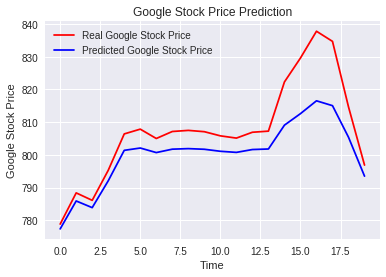

In [66]:
#Visualisation
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Homework 

In [67]:
#real stock prices for 2012-2016
df3=pd.read_csv('Google_Stock_Price_Train.csv')
test2=df3.iloc[:,1:2].values

In [68]:
pred = regressor.predict(x_train)
pred = sc.inverse_transform(pred)

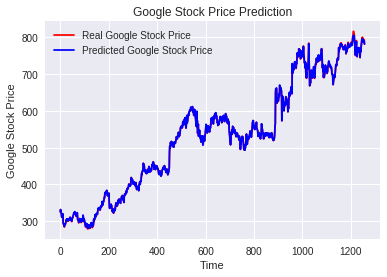

In [69]:
# Visualising the results
plt.plot(test2, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Evaluating and Tuning the RNN

In [71]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test2[:-1], pred))

In [73]:
print(rmse*100)

95.56603497507149
